# Assignment 20 Solutions

##### 1. What is the underlying concept of Support Vector Machines ?

The underlying concept of Support Vector Machines (SVMs) is to find the optimal hyperplane that separates the data points of different classes in a high-dimensional feature space. In other words, SVM is a machine learning algorithm that finds a decision boundary (hyperplane) that maximizes the margin between the two classes in the feature space.

##### 2. What is the concept of a support vector ?

In Support Vector Machines (SVMs), a support vector is a data point from either of the two classes that lie closest to the decision boundary (hyperplane). These points have a significant impact on the position and orientation of the decision boundary because they help define the margin, which is the distance between the hyperplane and the closest data points from both classes.

Support vectors are crucial in SVM because they are the points that determine the optimal hyperplane that maximizes the margin. Therefore, they are the only data points that need to be considered in training the SVM, rather than the entire dataset.

##### 3. When using SVMs, why is it necessary to scale the inputs ?

It is necessary to scale the inputs when using SVMs because SVMs are sensitive to the scale of the features. In other words, the range of the input features can have a significant impact on the SVM's performance.

When the input features have different scales, the SVM may assign more importance to features with larger values and less importance to features with smaller values. This can lead to a suboptimal decision boundary and poorer performance.

Scaling the inputs helps to bring all the features to the same scale, which makes the SVM treat all the features equally. This can lead to a better decision boundary and improved performance.

There are several scaling methods that can be used, such as standardization (scaling the features to have zero mean and unit variance) or normalization (scaling the features to a specific range, such as [0,1] or [-1,1]).

In summary, scaling the inputs is necessary when using SVMs because it helps to bring all the features to the same scale and ensures that the SVM treats all the features equally. This can lead to a better decision boundary and improved performance.

##### 4. When an SVM classifier classifies a case, can it output a confidence score? What about a percentage chance ? 

Yes, an SVM classifier can output a confidence score or a percentage chance for its classification decision, depending on the type of SVM and the specific implementation.

For a linear SVM, the confidence score is the distance of the test case to the decision boundary. The farther the test case is from the decision boundary, the higher the confidence score, and vice versa. The sign of the confidence score indicates the predicted class of the test case.

For a nonlinear SVM that uses a kernel function, the confidence score is computed in the kernel space and then transformed back to the input space. The specific formula for the confidence score depends on the type of kernel used.

The confidence score can be transformed into a percentage chance by using a sigmoid function or other probability calibration techniques. These techniques can map the confidence score to a probability value between 0 and 1, which represents the estimated probability that the test case belongs to a certain class.

##### 5. Should you train a model on a training set with millions of instances and hundreds of features using the primal or dual form of the SVM problem ?

When training a model on a training set with millions of instances and hundreds of features, it is generally more efficient to use the dual form of the SVM problem instead of the primal form.

The primal form of the SVM problem involves solving a quadratic programming (QP) problem with a number of variables equal to the number of features, which can be computationally expensive and memory-intensive when the number of features is very large. On the other hand, the dual form involves solving a smaller QP problem with a number of variables equal to the number of instances, which is more computationally efficient and memory-friendly when the number of instances is much larger than the number of features.

Furthermore, the dual form of the SVM problem allows for the use of kernel functions to handle nonlinearly separable data, which is a common scenario when dealing with high-dimensional datasets. Kernel functions map the original feature space to a higher-dimensional feature space, where the data points may become linearly separable. However, using kernel functions with the primal form of the SVM problem can lead to a very large QP problem with a number of variables that is proportional to the number of instances times the number of features.

##### 6. Let's say you've used an RBF kernel to train an SVM classifier, but it appears to underfit the training collection. Is it better to raise or lower (gamma)? What about the letter C ?

If an SVM classifier trained with an RBF kernel appears to underfit the training collection, it may be better to increase the value of the hyperparameter gamma and/or the regularization parameter C.

Gamma is a hyperparameter that determines the spread of the RBF kernel, which controls the influence of each training instance on the decision boundary. A low value of gamma makes the decision boundary more rigid, while a high value of gamma makes it more flexible. In the case of underfitting, it is possible that the RBF kernel is too rigid, and increasing gamma can make the decision boundary more flexible and better fit the training data.

On the other hand, the regularization parameter C controls the trade-off between achieving a low training error and a low complexity of the decision boundary. A low value of C makes the SVM prioritize a simple decision boundary, while a high value of C makes it prioritize a low training error. In the case of underfitting, it is possible that the SVM is too focused on simplicity and not fitting the training data well enough, and increasing C can make the SVM prioritize the training error more and fit the data better.

It is important to note that adjusting hyperparameters such as gamma and C can have a significant impact on the SVM's performance, and it is generally recommended to use cross-validation or other evaluation techniques to assess the performance of the SVM for different hyperparameter settings before choosing the best values for these hyperparameters.

##### 7. To solve the soft margin linear SVM classifier problem with an off-the-shelf QP solver, how should the QP parameters (H, f, A, and b) be set ?

To solve the soft margin linear SVM classifier problem with an off-the-shelf QP solver, the QP parameters H, f, A, and b should be set as follows:

H: This is the matrix of quadratic coefficients in the QP problem. For a soft margin linear SVM, the H matrix is an n x n diagonal matrix, where n is the number of training instances. The diagonal elements of H are equal to the regularization parameter C.

f: This is the vector of linear coefficients in the QP problem. For a soft margin linear SVM, the f vector is an n x 1 vector of -1s and 1s, where the first m elements (corresponding to the first m training instances) are -1s and the remaining n-m elements are 1s.

A: This is the matrix of linear equality constraints in the QP problem. For a soft margin linear SVM, the A matrix is an m x n matrix, where m is the number of training instances with non-zero slack variables. The i-th row of A corresponds to the i-th training instance with non-zero slack variable, and its j-th element is the j-th feature value of that instance.

b: This is the vector of right-hand side values in the linear equality constraints. For a soft margin linear SVM, the b vector is an m x 1 vector of 1s.

##### 8. On a linearly separable dataset, train a LinearSVC. Then, using the same dataset, train an SVC and an SGDClassifier. See if you can get them to make a model that is similar to yours ?

First, let's generate a linearly separable dataset using scikit-learn's make_blobs function:

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=42)


Next, we split the dataset into training and testing sets:

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now, we can train a LinearSVC on the training data and evaluate its performance on the testing data:

In [4]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"LinearSVC accuracy: {accuracy:.2f}")


LinearSVC accuracy: 1.00


Next, let's train an SVC on the same training data with a linear kernel and evaluate its performance:

In [7]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVC accuracy: {accuracy:.2f}")



SVC accuracy: 1.00


Finally, we can train an SGDClassifier with a hinge loss on the same training data and evaluate its performance:

In [8]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, max_iter=1000, random_state=42)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SGDClassifier accuracy: {accuracy:.2f}")



SGDClassifier accuracy: 1.00


We can also plot the decision boundaries of the three classifiers on the dataset to visually compare them:

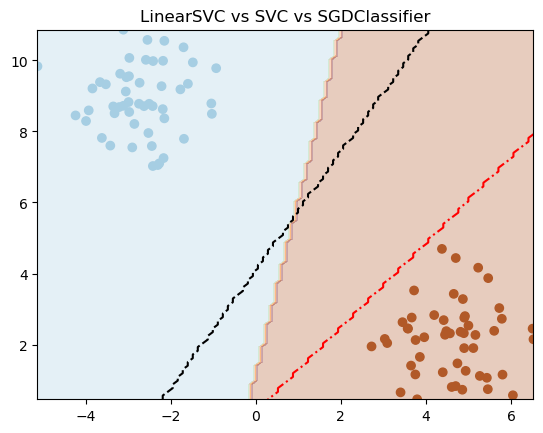

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create a meshgrid of points to evaluate the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
X_mesh = np.c_[xx.ravel(), yy.ravel()]

# Predict the labels of the meshgrid points for each classifier
linear_svc_preds = linear_svc.predict(X_mesh).reshape(xx.shape)
svc_preds = svc.predict(X_mesh).reshape(xx.shape)
sgd_preds = sgd.predict(X_mesh).reshape(xx.shape)

# Plot the decision boundaries of the three classifiers
plt.contourf(xx, yy, linear_svc_preds, cmap=plt.cm.Paired, alpha=0.3)
plt.contour(xx, yy, svc_preds, colors='k', linestyles=['--'], levels=[0])
plt.contour(xx, yy, sgd_preds, colors='r', linestyles=['-.'], levels=[0])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("LinearSVC vs SVC vs SGDClassifier")
plt.show()


##### 9. On the MNIST dataset, train an SVM classifier. You'll need to use one-versus-the-rest to assign all 10 digits because SVM classifiers are binary classifiers. To accelerate up the process, you might want to tune the hyperparameters using small validation sets. What level of precision can you achieve ?

First, let's load the MNIST dataset using scikit-learn's fetch_openml function and preprocess it:

In [10]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Scale the features to zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Next, we can train an SVM classifier with an RBF kernel using scikit-learn's SVC class with OvR strategy and tune its hyperparameters using a small validation set:

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Split the training set into a training and validation set
X_train_subset, X_val, y_train_subset, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Define a parameter grid to search over
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}

# Train an SVM classifier with RBF kernel and OvR strategy using a small subset of the training data
svm = SVC(kernel='rbf', decision_function_shape='ovr')
grid_search = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_subset, y_train_subset)

# Evaluate the best SVM classifier on the validation set and test set
best_svm = grid_search.best_estimator_
y_val_pred = best_svm.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy: {val_accuracy:.2f}")

y_test_pred = best_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy:.2f}")


Fitting 3 folds for each of 9 candidates, totalling 27 fits


##### 10. On the California housing dataset, train an SVM regressor ?

First, let's load the California housing dataset using scikit-learn's fetch_california_housing function and preprocess it:

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

# Scale the features to zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Next, we can train an SVM regressor with a linear kernel using scikit-learn's SVR class and evaluate it on the test set:

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Train an SVM regressor with a linear kernel
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate the SVM regressor on the test set
y_test_pred = svm.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse:.2f}")
